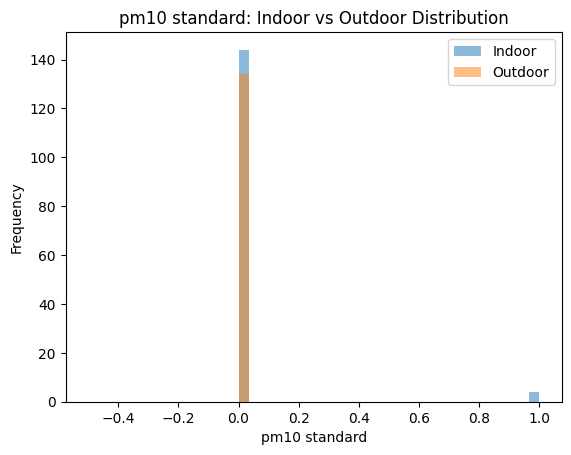

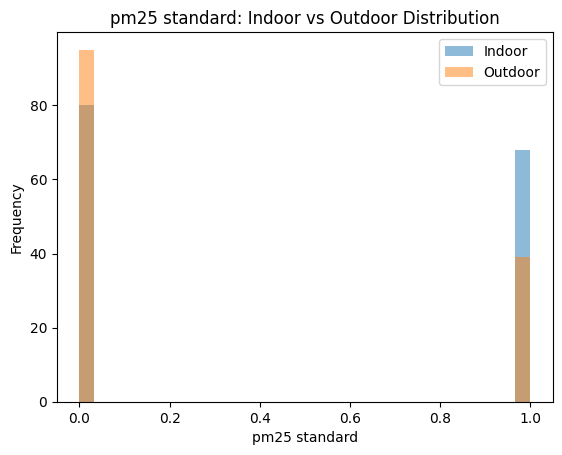

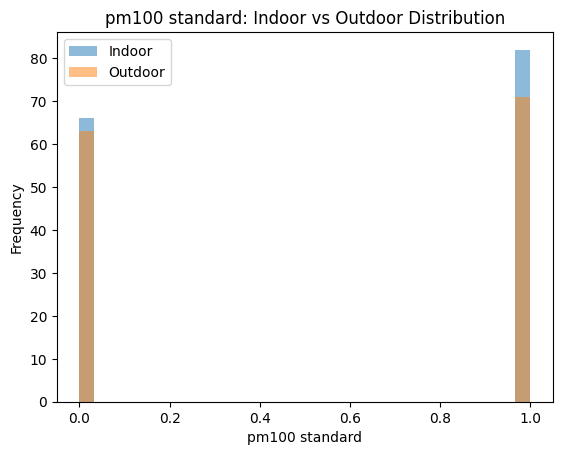

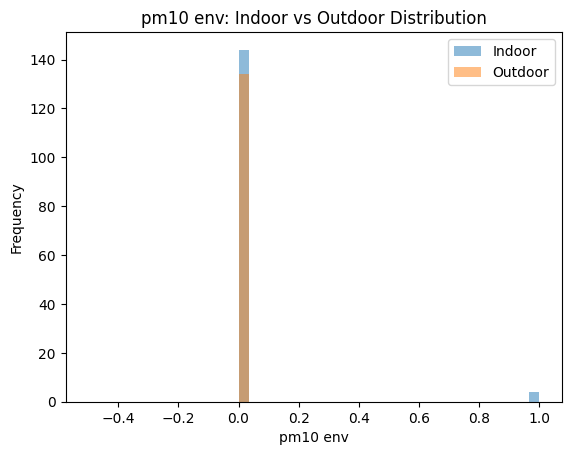

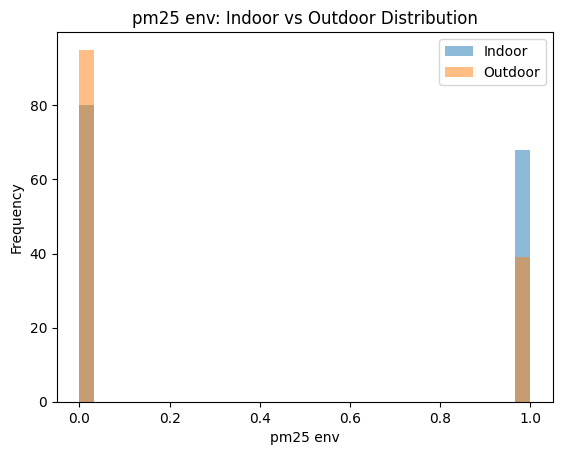

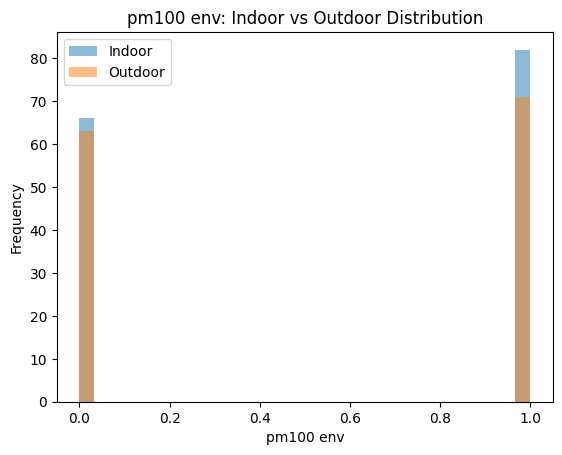

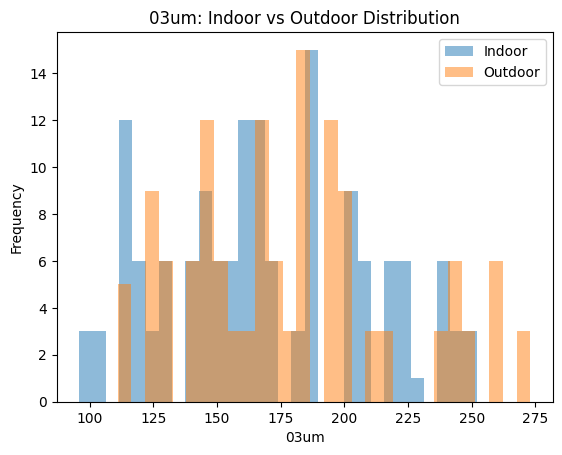

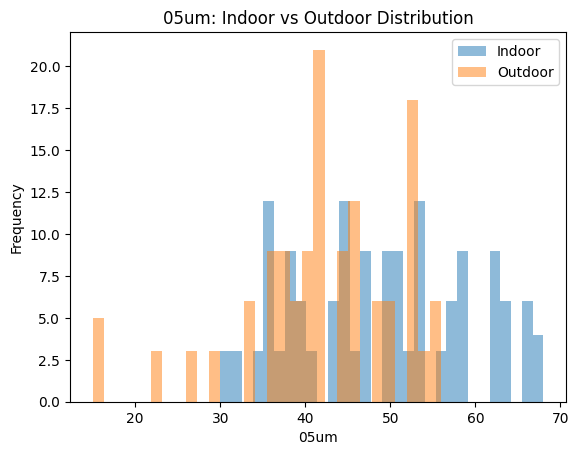

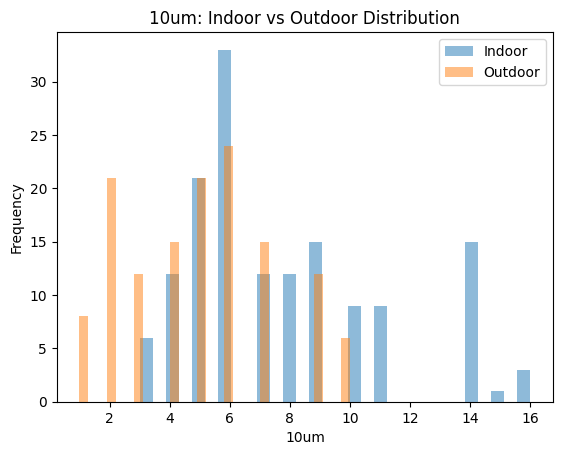

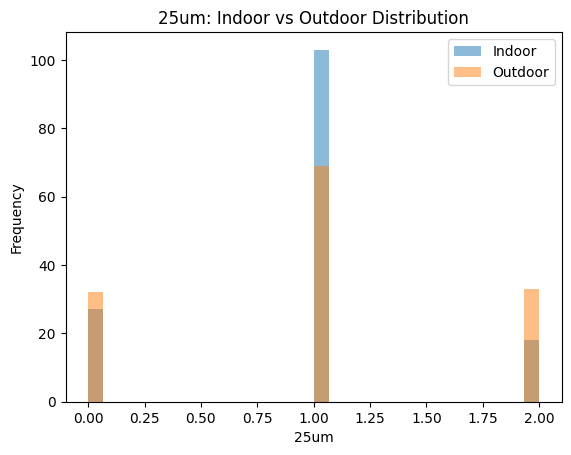

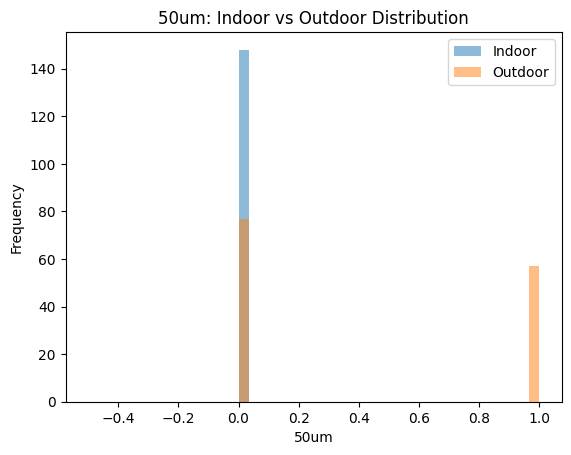

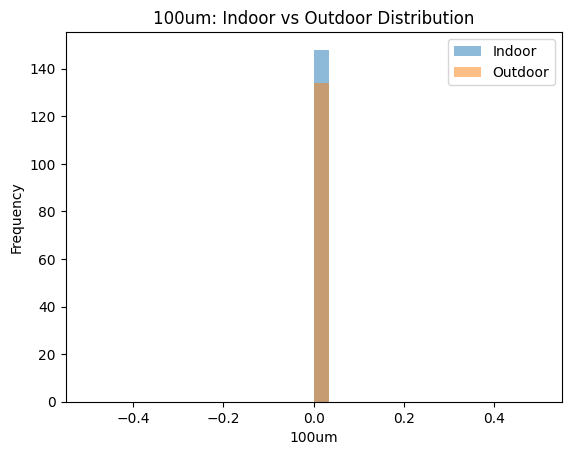

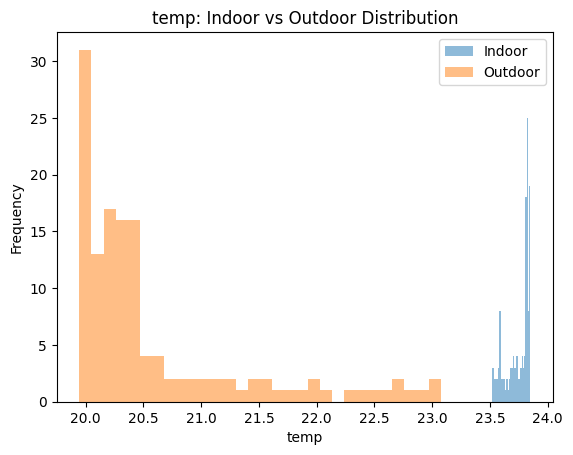

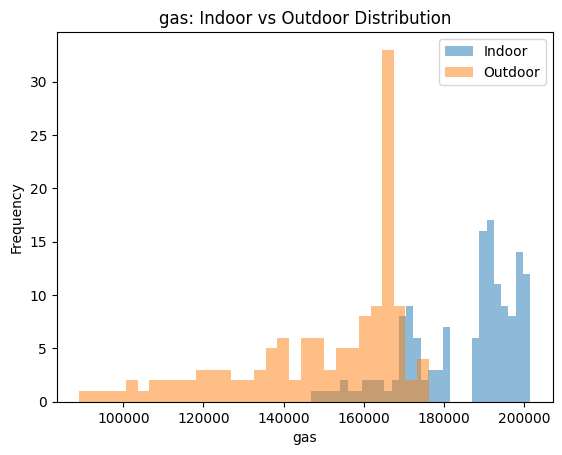

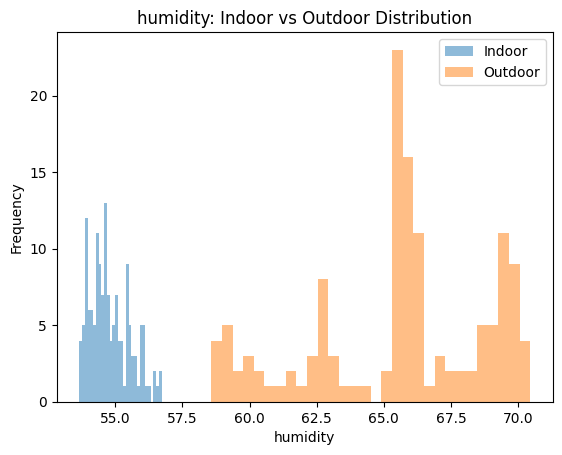

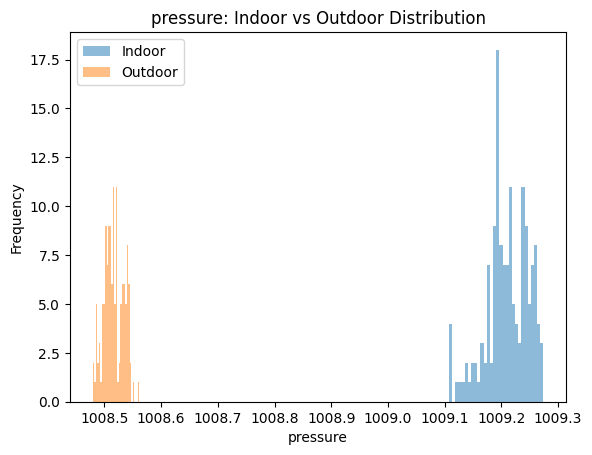

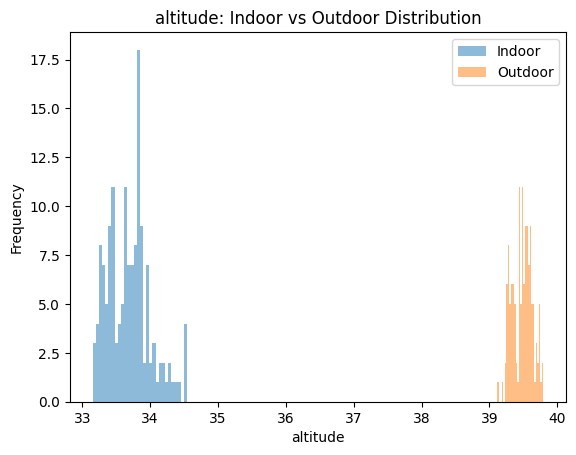

In [21]:
#Step 1, (2):
#Histograms of our indoor vs. outdoor data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

indoor = pd.read_csv('lab6_trial1_indoor.csv')

#drop first row bc of calibration
indoor = indoor.iloc[1:].reset_index(drop=True)

# Convert time to seconds since start
indoor["time_seconds"] = indoor["time"] - indoor["time"].iloc[0]

#Remove first 45 seconds of data
indoor_filtered = indoor[indoor["time_seconds"] >= 45]

 
outdoor = pd.read_csv('lab6_trial2_outdoor.csv')

#drop first row bc of calibration
outdoor = outdoor.iloc[1:].reset_index(drop=True)

# Convert time to seconds since start
outdoor["time_seconds"] = outdoor["time"] - outdoor["time"].iloc[0]

#Remove first 45 seconds of data
outdoor_filtered = outdoor[outdoor["time_seconds"] >= 45]

# Plot every variable vs time
variables = [c for c in indoor_filtered.columns if c not in ["time", "time_seconds"]]
variables = [c for c in outdoor_filtered.columns if c not in ["time", "time_seconds"]]

# Create histogram for each variable
for var in variables:
    plt.figure()
    
    plt.hist(indoor_filtered[var], bins=30, alpha=0.5, label="Indoor")
    plt.hist(outdoor_filtered[var], bins=30, alpha=0.5, label="Outdoor")
    
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"{var}: Indoor vs Outdoor Distribution")
    plt.legend()
    plt.show()

In [9]:
#Step 1, (3):
#Statistical Comparisons for our indoor vs. outdoor data


import numpy as np
import pandas as pd

trial5 = indoor_filtered
trial6 = outdoor_filtered

cols = [
    'temp', 'pressure', 'gas', 'humidity', 'altitude',
    'pm10 standard', 'pm25 standard', 'pm100 standard',
    'pm10 env', 'pm25 env', 'pm100 env',
    '03um', '05um', '10um', '25um', '50um', '100um'
]

results = []

for col in cols:
    x5 = trial5[col].dropna()
    x6 = trial6[col].dropna()

    n5, n6 = len(x5), len(x6)

    m5 = x5.mean()
    s5 = x5.std(ddof=1)
    sem5 = s5 / np.sqrt(n5) if n5 > 1 else np.nan

    m6 = x6.mean()
    s6 = x6.std(ddof=1)
    sem6 = s6 / np.sqrt(n6) if n6 > 1 else np.nan

    diff = abs(m6 - m5)

    sigma_sep_inside = diff / sem5 if np.isfinite(sem5) and sem5 > 0 else np.nan

    # 3-sigma rule using inside mean uncertainty
    statistically_different = (
        "YES" if np.isfinite(sigma_sep_inside) and sigma_sep_inside >= 3 else
        "NO" if np.isfinite(sigma_sep_inside) else
        "N/A"
    )

    results.append([
        col,
        m5, sem5,
        m6, sem6,
        diff,
        sigma_sep_inside,
        statistically_different
    ])

df_results = pd.DataFrame(results, columns=[
    "Variable",
    "Inside Mean",
    "Inside Mean Uncertainty (1σ)",
    "Outside Mean",
    "Outside Mean Uncertainty (1σ)",
    "|Mean Difference|",
    "Separation (Inside σ)",
    "Statistically Different? (>=3σ)"
])

df_results = df_results.round(3)
df_results


,Variable,Inside Mean,Inside Mean Uncertainty (1σ),Outside Mean,Outside Mean Uncertainty (1σ),|Mean Difference|,Separation (Inside σ),Statistically Different? (>=3σ)
0,temp,23.740,0.008,20.582,0.067,3.158,373.473,YES
1,pressure,1009.210,0.003,1008.516,0.002,0.693,223.599,YES
2,gas,185142.034,1109.115,149097.903,1815.151,36044.131,32.498,YES
3,humidity,54.812,0.061,65.569,0.281,10.756,175.605,YES
4,altitude,33.692,0.026,39.485,0.013,5.794,223.659,YES
5,pm10 standard,0.027,0.013,0.000,0.000,0.027,2.021,NO
6,pm25 standard,0.459,0.041,0.291,0.039,0.168,4.097,YES
7,pm100 standard,0.554,0.041,0.530,0.043,0.024,0.590,NO
8,pm10 env,0.027,0.013,0.000,0.000,0.027,2.021,NO
9,pm25 env,0.459,0.041,0.291,0.039,0.168,4.097,YES


#Step 1 (3):
Some of the graphs like for the variables: 3um, 5um, 10um, temp, gas, did not necessarily follow a normal distribution, but it does not necessarily mean that we didn't take enough data. Some of the data is just extremely consistent (or zero) and so it would follow a 'constant' or uniform distribution. Some of the other data seem to have long tails and this could be because of a large calibration gap. More data in this instance would likely make most of our observations more accurate.

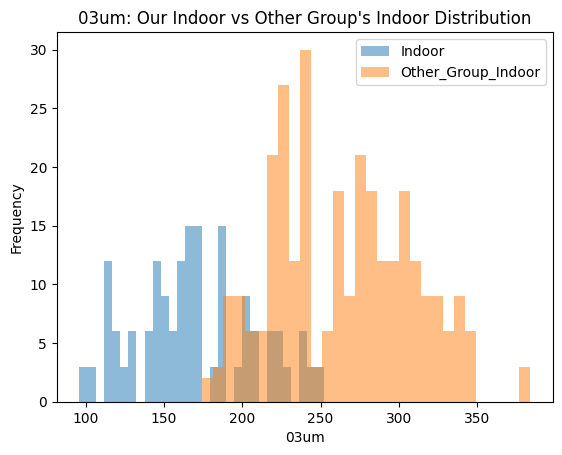

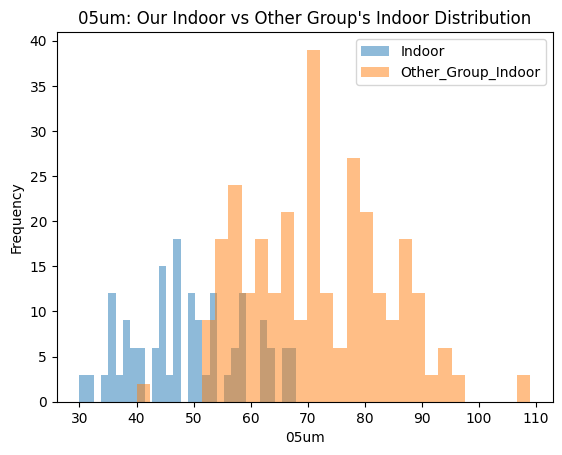

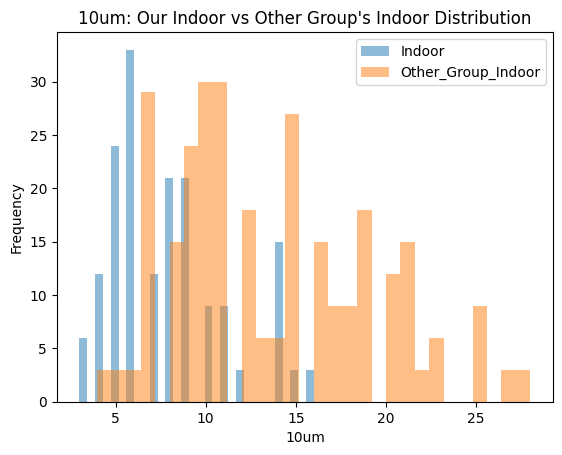

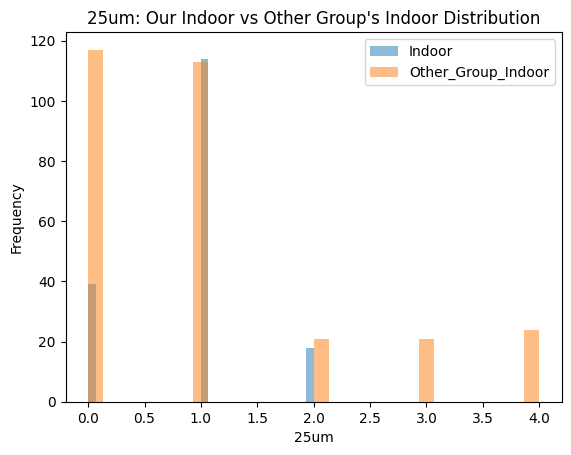

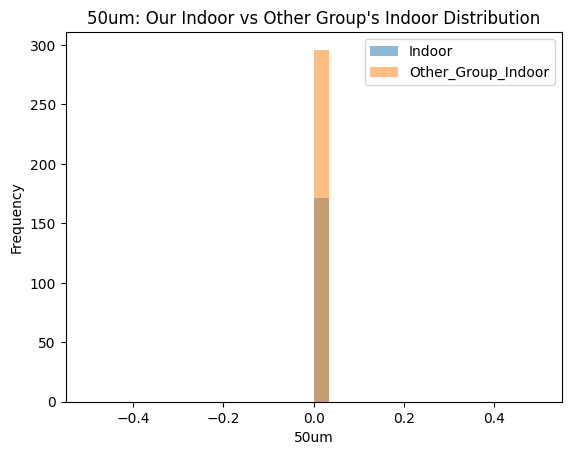

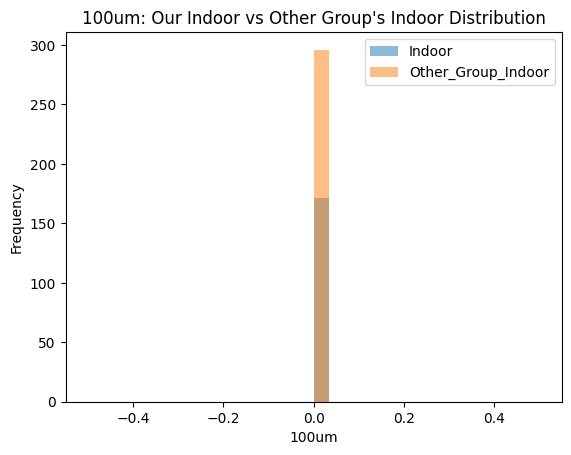

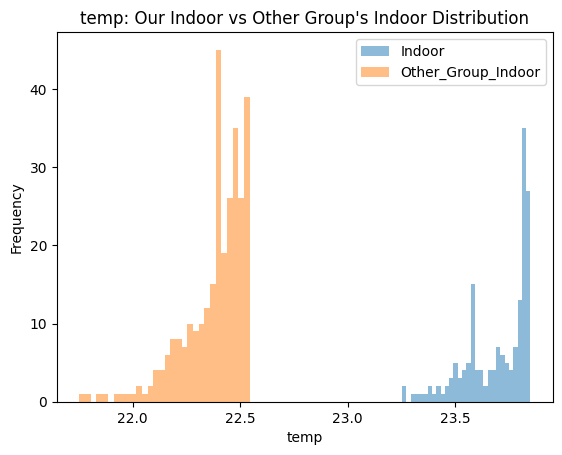

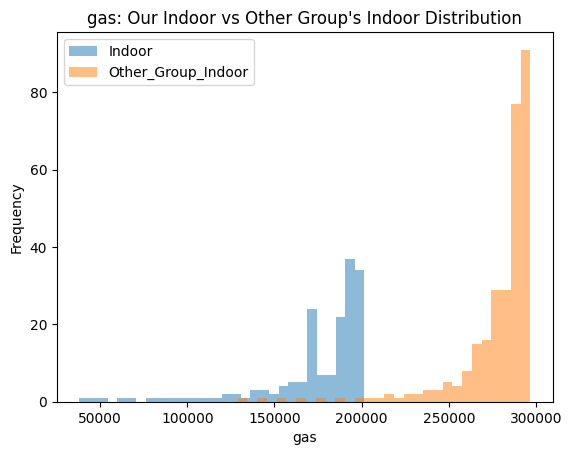

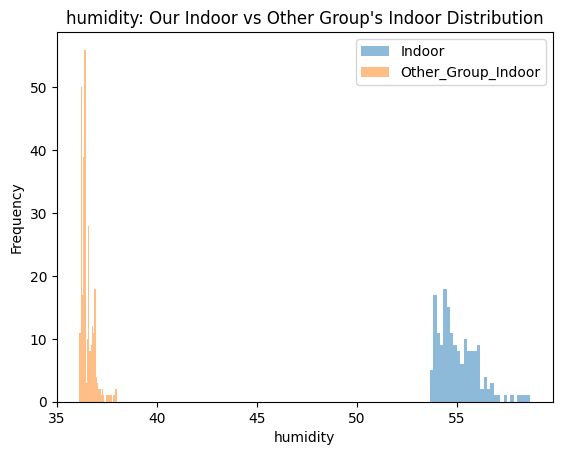

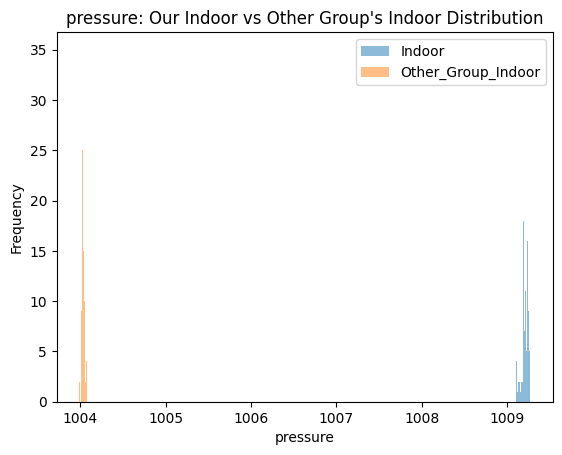

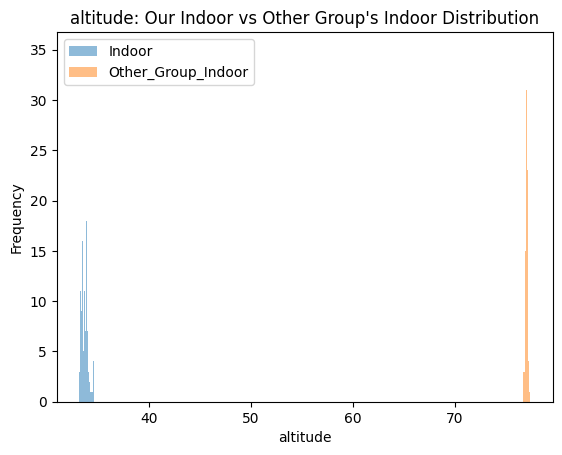

In [35]:
#Step 2 (1):
#Histograms of our indoor vs. other group's indoor data
#Plot other_indoor variables 
other_indoor = pd.read_csv('other_groups_inside_data_5mins.csv')
other_indoor = other_indoor.iloc[1:].reset_index(drop=True) #drop first row bc of calibration

# Convert time to seconds since start
other_indoor["time_seconds"] = other_indoor["time"] - other_indoor["time"].iloc[0]

#align column names
other_indoor = other_indoor.rename(columns={
    "particles 03um": "03um",
    "particles 05um": "05um",
    "particles 10um": "10um",
    "particles 25um": "25um",
    "particles 50um": "50um",
    "particles 100um": "100um",
    "Temperature C": "temp",
    "Gas Ohm": "gas",
    "Humidity %%": "humidity",
    "Pressure hPa": "pressure",
    "Altitude meters": "altitude"
})

#filter our dataset to match columns of other group
ours_indoor_filtered = indoor.drop(columns = ['pm10 standard', 'pm25 standard', 'pm100 standard',	'pm10 env',	'pm25 env',	'pm100 env'])
ours_indoor_filtered

# Plot every variable vs time
variables = [c for c in other_indoor.columns if c not in ["time", "time_seconds"]]
variables = [c for c in ours_indoor_filtered.columns if c not in ["time", "time_seconds"]]

# Create histogram for each variable
for var in variables:
    plt.figure()
    
    plt.hist(ours_indoor_filtered[var], bins=30, alpha=0.5, label="Indoor")
    plt.hist(other_indoor[var], bins=30, alpha=0.5, label="Other_Group_Indoor")
    
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"{var}: Our Indoor vs Other Group's Indoor Distribution")
    plt.legend()
    plt.show()

In [42]:
import numpy as np
import pandas as pd

trialA = ours_indoor_filtered
trialB = other_indoor

cols = [
    'temp', 'pressure', 'gas', 'humidity', 'altitude',
    '03um', '05um', '10um', '25um', '50um', '100um'
]

results = []

for col in cols:
    xA = trialA[col].dropna()
    xB = trialB[col].dropna()

    nA, nB = len(xA), len(xB)

    mA = xA.mean()
    sA = xA.std(ddof=1)
    semA = sA / np.sqrt(nA) if nA > 1 else np.nan

    mB = xB.mean()
    sB = xB.std(ddof=1)
    semB = sB / np.sqrt(nB) if nB > 1 else np.nan

    diff = abs(mB - mA)

    sigma_sep = diff / semA if np.isfinite(semA) and semA > 0 else np.nan

    statistically_different = (
        "YES" if np.isfinite(sigma_sep) and sigma_sep >= 3 else
        "NO" if np.isfinite(sigma_sep) else
        "N/A"
    )

    results.append([
        col,
        mA, semA,
        mB, semB,
        diff,
        sigma_sep,
        statistically_different
    ])

df_indoor_comparison = pd.DataFrame(results, columns=[
    "Variable",
    "Our Indoor Mean",
    "Our Indoor Mean Uncertainty (1σ)",
    "Other Indoor Mean",
    "Other Indoor Mean Uncertainty (1σ)",
    "|Mean Difference|",
    "Separation (Our σ)",
    "Statistically Different? (>=3σ)"
])

df_indoor_comparison = df_indoor_comparison.round(3)
df_indoor_comparison


,Variable,Our Indoor Mean,Our Indoor Mean Uncertainty (1σ),Other Indoor Mean,Other Indoor Mean Uncertainty (1σ),|Mean Difference|,Separation (Our σ),Statistically Different? (>=3σ)
0,temp,23.697,0.011,22.383,0.008,1.315,115.804,YES
1,pressure,1009.215,0.003,1004.034,0.001,5.181,1814.870,YES
2,gas,174258.965,2500.994,278366.034,1419.091,104107.069,41.626,YES
3,humidity,55.067,0.077,36.521,0.019,18.546,240.307,YES
4,altitude,33.651,0.024,77.015,0.007,43.364,1818.633,YES
5,03um,169.579,2.919,263.757,2.535,94.178,32.259,YES
6,05um,48.947,0.753,71.733,0.716,22.786,30.275,YES
7,10um,7.912,0.246,13.659,0.319,5.747,23.317,YES
8,25um,0.877,0.043,1.061,0.071,0.184,4.244,YES
9,50um,0.000,0.000,0.000,0.000,0.000,NaN,N/A


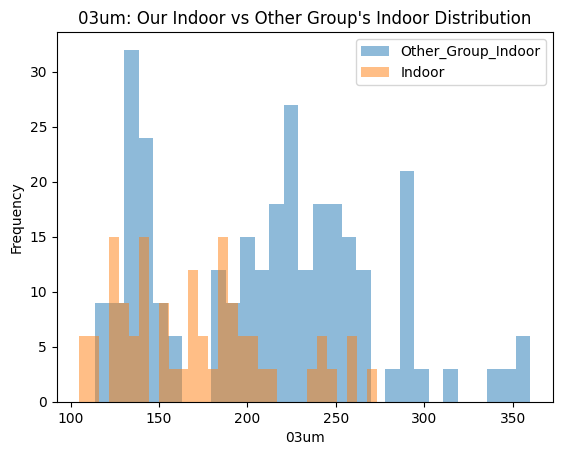

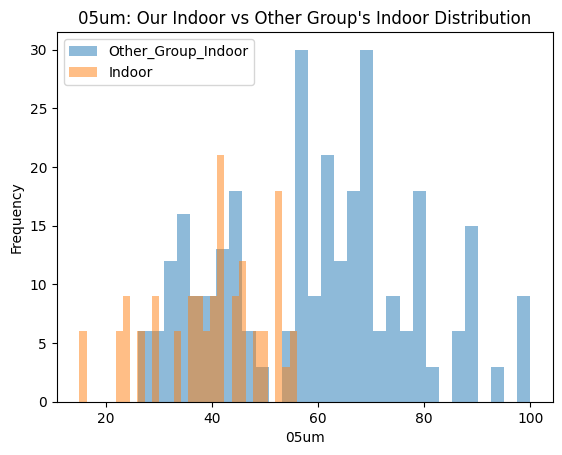

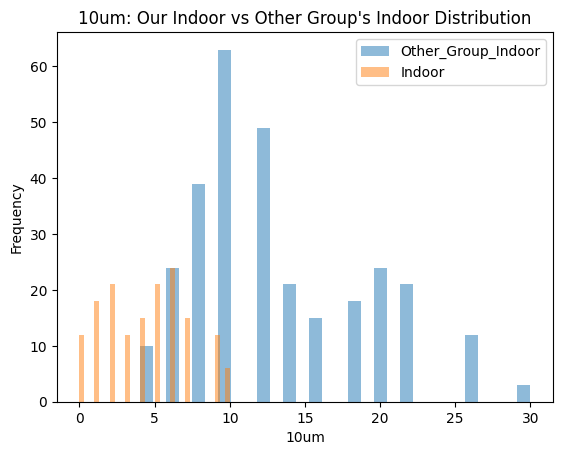

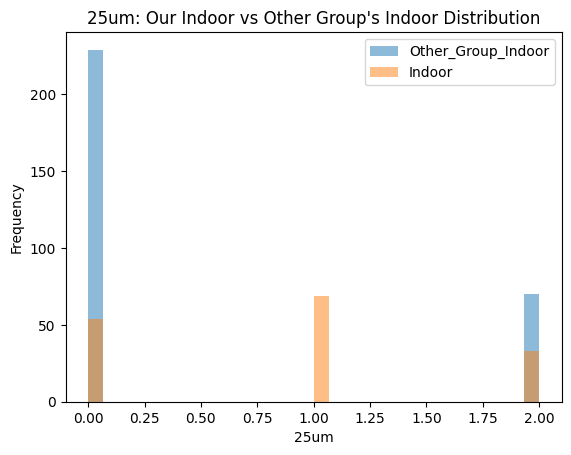

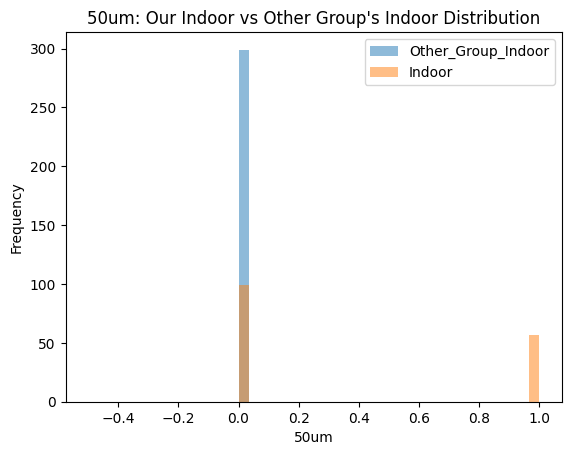

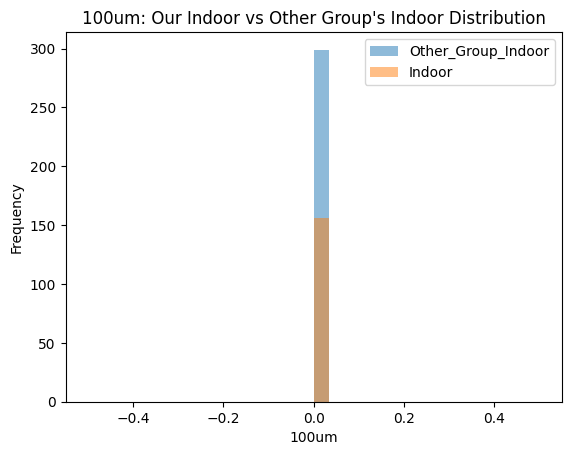

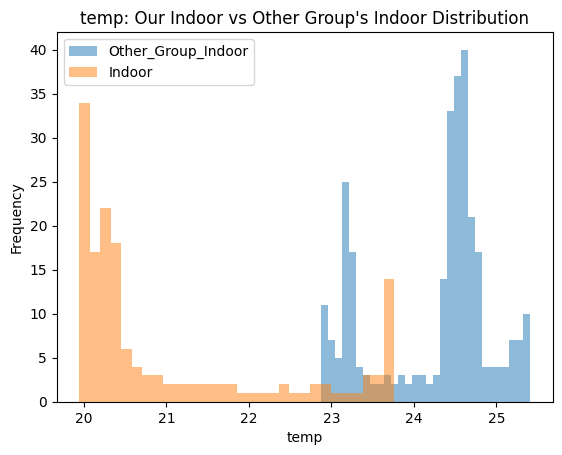

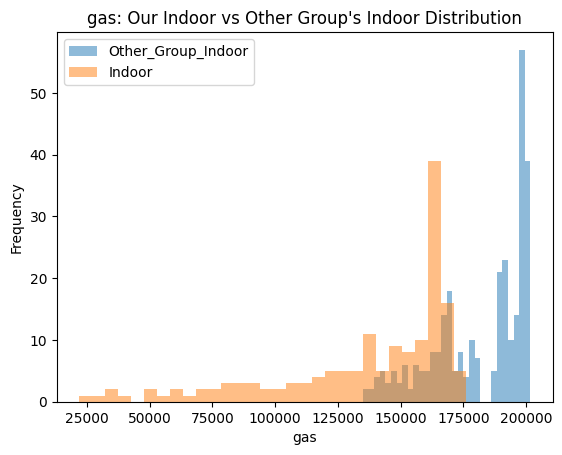

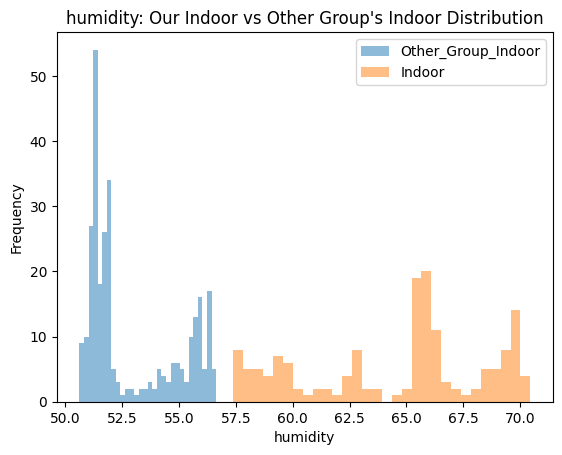

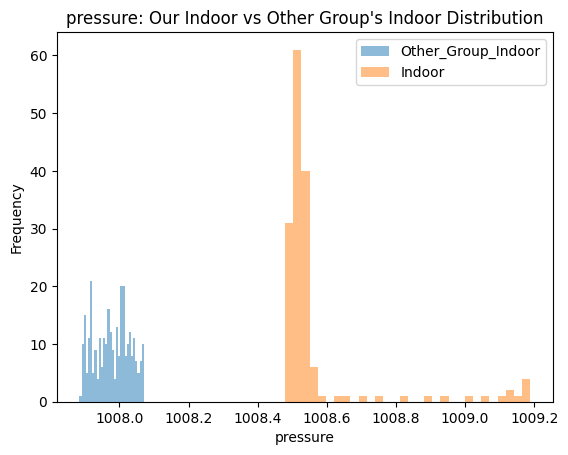

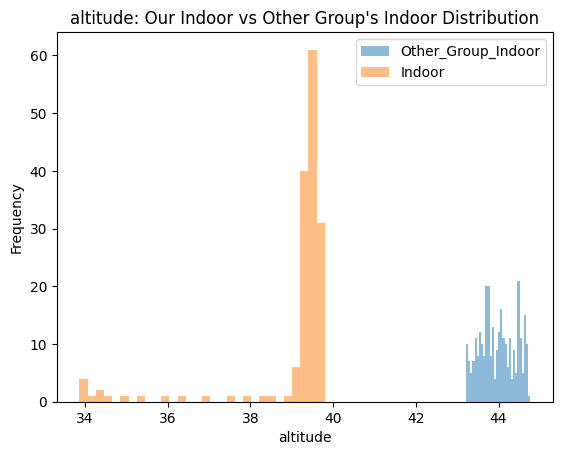

In [38]:
#Step 2 (2):
#Histograms of our outdoor vs. other group's outdoor data
#Plot other_indoor variables 
other_outdoor = pd.read_csv('other_groups_outside_data_5mins.csv')
other_outdoor = other_outdoor.iloc[1:].reset_index(drop=True) #drop first row bc of calibration

# Convert time to seconds since start
other_outdoor["time_seconds"] = other_outdoor["time"] - other_outdoor["time"].iloc[0]

#align column names
other_outdoor = other_outdoor.rename(columns={
    "particles 03um": "03um",
    "particles 05um": "05um",
    "particles 10um": "10um",
    "particles 25um": "25um",
    "particles 50um": "50um",
    "particles 100um": "100um",
    "Temperature C": "temp",
    "Gas Ohm": "gas",
    "Humidity %%": "humidity",
    "Pressure hPa": "pressure",
    "Altitude meters": "altitude"
})

#filter our dataset to match columns of other group
ours_outdoor_filtered = outdoor.drop(columns = ['pm10 standard', 'pm25 standard', 'pm100 standard',	'pm10 env',	'pm25 env',	'pm100 env'])
ours_outdoor_filtered

# Plot every variable vs time
variables = [c for c in other_outdoor.columns if c not in ["time", "time_seconds"]]
variables = [c for c in ours_outdoor_filtered.columns if c not in ["time", "time_seconds"]]

# Create histogram for each variable
for var in variables:
    plt.figure()
    plt.hist(other_outdoor[var], bins=30, alpha=0.5, label="Other_Group_Indoor")
    plt.hist(ours_outdoor_filtered[var], bins=30, alpha=0.5, label="Indoor")
    
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"{var}: Our Indoor vs Other Group's Indoor Distribution")
    plt.legend()
    plt.show()

In [40]:
import numpy as np
import pandas as pd

trialA = ours_outdoor_filtered
trialB = other_outdoor

cols = [
    'temp', 'pressure', 'gas', 'humidity', 'altitude',
    '03um', '05um', '10um', '25um', '50um', '100um'
]

results = []

for col in cols:
    xA = trialA[col].dropna()
    xB = trialB[col].dropna()

    nA, nB = len(xA), len(xB)

    mA = xA.mean()
    sA = xA.std(ddof=1)
    semA = sA / np.sqrt(nA) if nA > 1 else np.nan

    mB = xB.mean()
    sB = xB.std(ddof=1)
    semB = sB / np.sqrt(nB) if nB > 1 else np.nan

    diff = abs(mB - mA)

    sigma_sep = diff / semA if np.isfinite(semA) and semA > 0 else np.nan

    statistically_different = (
        "YES" if np.isfinite(sigma_sep) and sigma_sep >= 3 else
        "NO" if np.isfinite(sigma_sep) else
        "N/A"
    )

    results.append([
        col,
        mA, semA,
        mB, semB,
        diff,
        sigma_sep,
        statistically_different
    ])

df_results = pd.DataFrame(results, columns=[
    "Variable",
    "Our Outdoor Mean",
    "Our Outdoor Mean Uncertainty (1σ)",
    "Other Outdoor Mean",
    "Other Outdoor Mean Uncertainty (1σ)",
    "|Mean Difference|",
    "Separation (Our σ)",
    "Statistically Different? (>=3σ)"
])

df_results = df_results.round(3)
df_results


,Variable,Our Outdoor Mean,Our Outdoor Mean Uncertainty (1σ),Other Outdoor Mean,Other Outdoor Mean Uncertainty (1σ),|Mean Difference|,Separation (Our σ),Statistically Different? (>=3σ)
0,temp,21.009,0.103,24.248,0.041,3.239,31.569,YES
1,pressure,1008.569,0.013,1007.978,0.003,0.591,46.023,YES
2,gas,136960.917,2932.039,181760.475,1063.313,44799.558,15.279,YES
3,humidity,64.550,0.316,52.901,0.114,11.649,36.893,YES
4,altitude,39.046,0.107,43.982,0.025,4.937,46.042,YES
5,03um,171.346,3.437,212.087,3.445,40.741,11.855,YES
6,05um,39.577,0.830,59.773,1.059,20.196,24.345,YES
7,10um,4.346,0.223,13.097,0.334,8.751,39.293,YES
8,25um,0.865,0.059,0.468,0.049,0.397,6.731,YES
9,50um,0.365,0.039,0.000,0.000,0.365,9.447,YES


Step 2 Description:

Given that a lot of the distributions are entirely seperate, but follow similar trends, good examples to look at are pressure, altitude, gas, or even temp, it shows that each sensor has it's own bias associated with it but there is 'lower' variance across both our experiments.

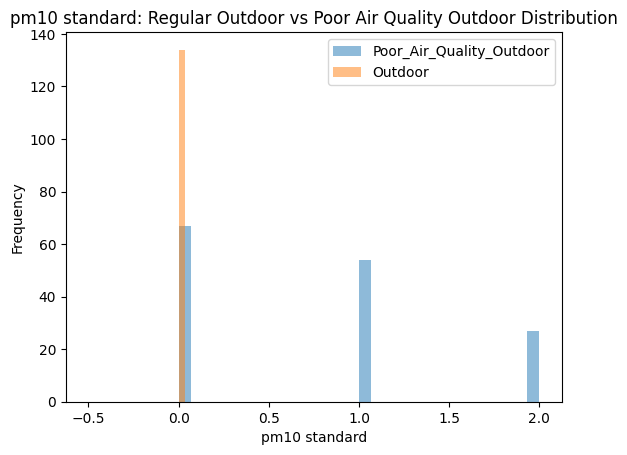

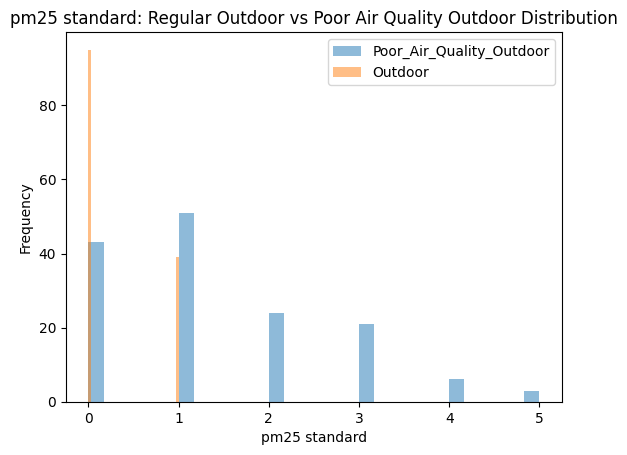

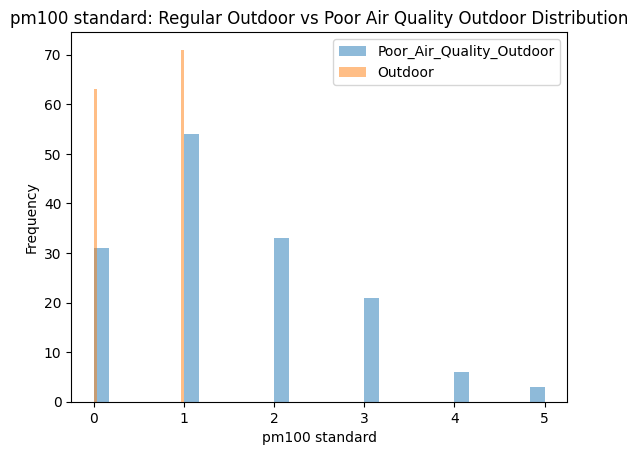

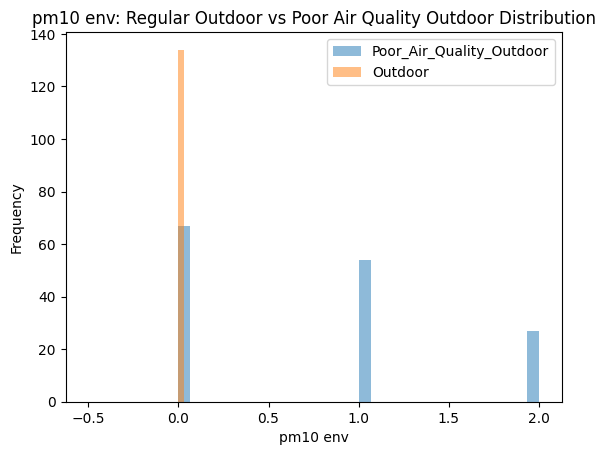

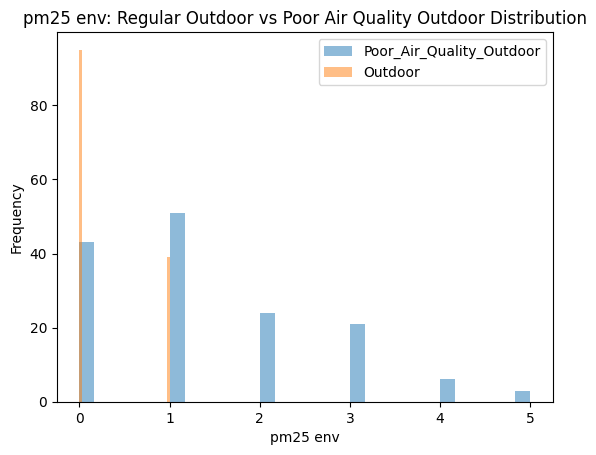

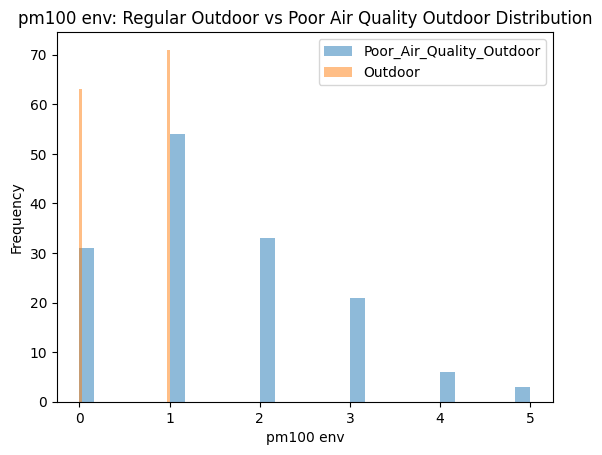

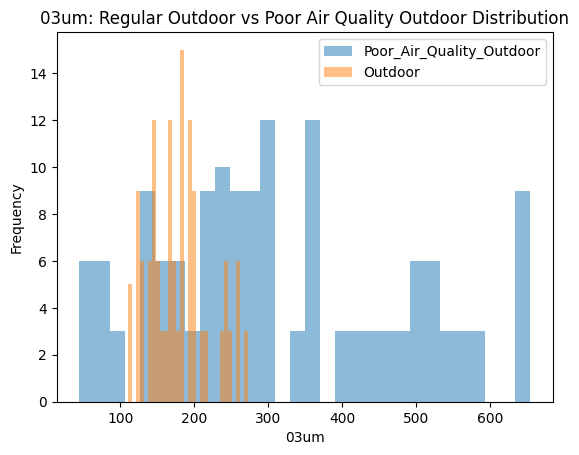

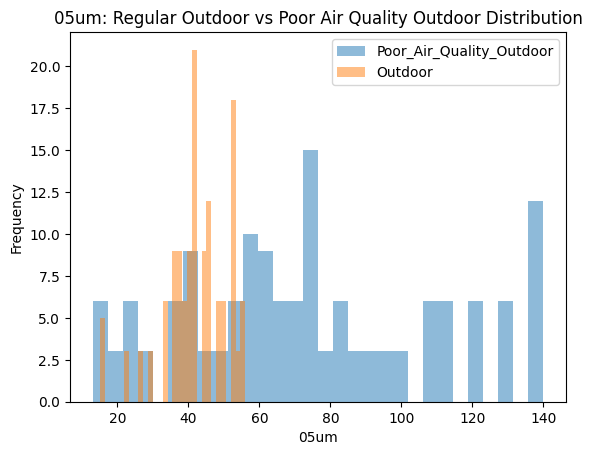

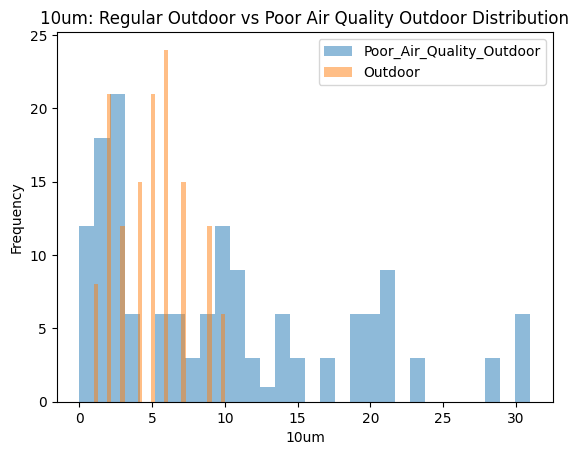

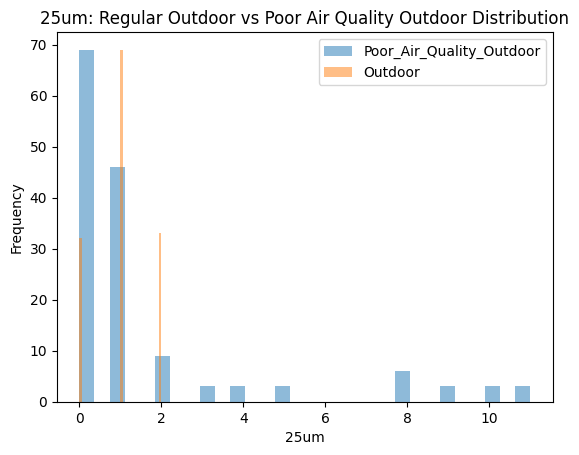

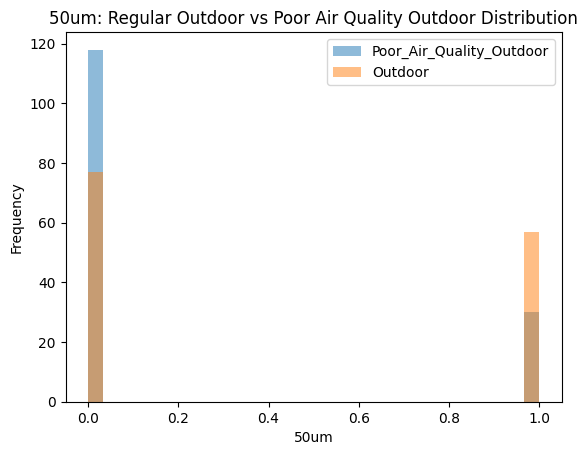

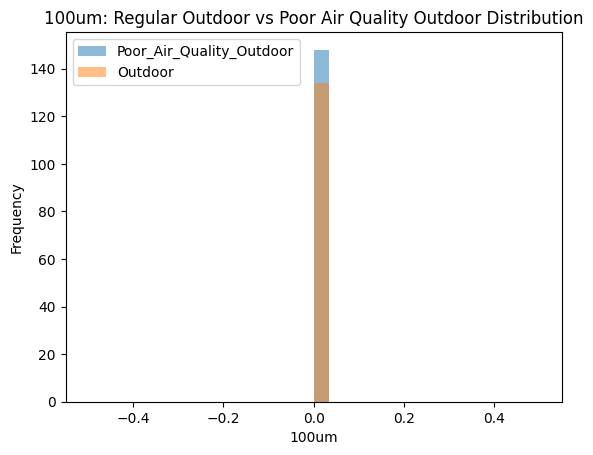

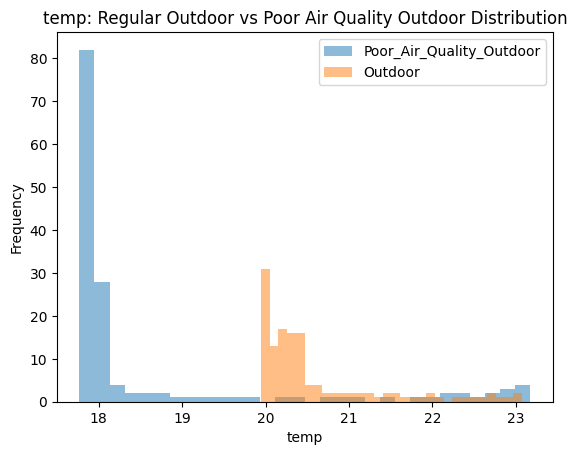

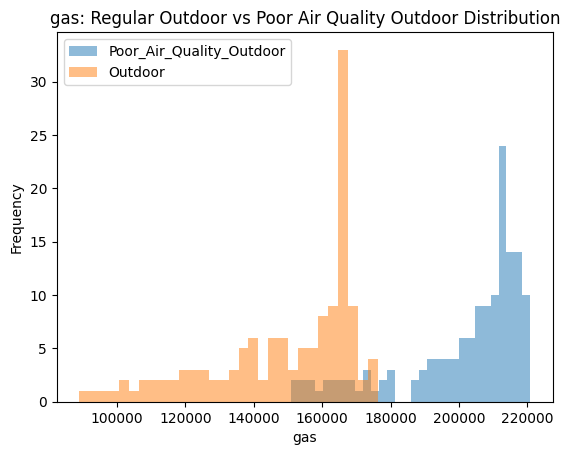

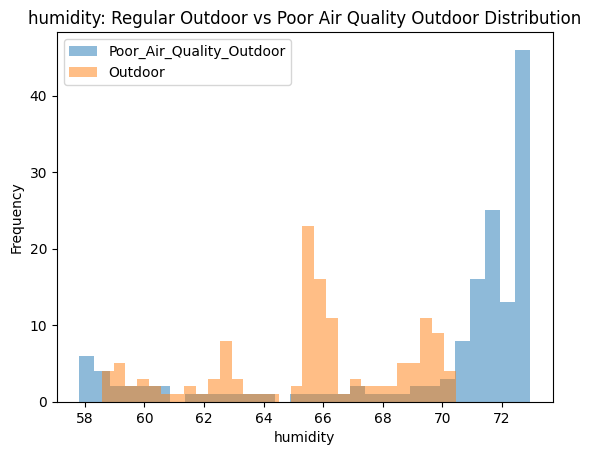

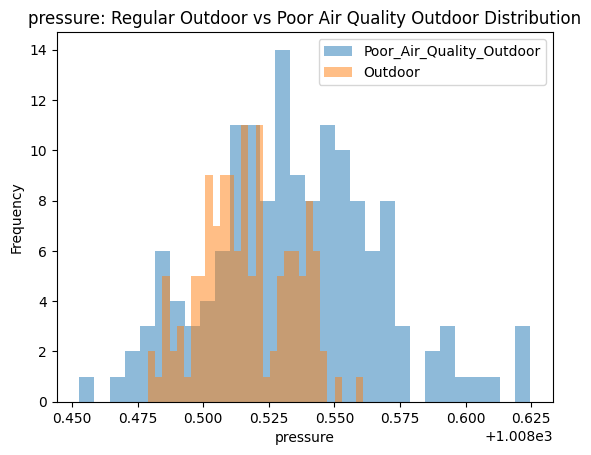

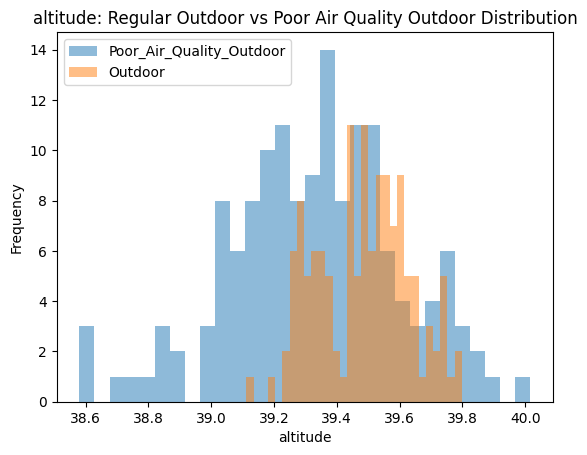

In [37]:
#Step 3 (1):
#Histograms of regular outdoor vs. poor air quality outdoor data
#Plot poor_outdoor variables 
poor_outdoor = pd.read_csv('lab6_trial1_unclean_trial.csv')
poor_outdoor = poor_outdoor.iloc[1:].reset_index(drop=True) #drop first row bc of calibration

# Convert time to seconds since start
poor_outdoor["time_seconds"] = poor_outdoor["time"] - poor_outdoor["time"].iloc[0]
poor_outdoor_filtered = poor_outdoor[poor_outdoor["time_seconds"] >= 45]

# Plot every variable vs time
variables = [c for c in poor_outdoor_filtered.columns if c not in ["time", "time_seconds"]]

# Create histogram for each variable
for var in variables:
    plt.figure()
    plt.hist(poor_outdoor_filtered[var], bins=30, alpha=0.5, label="Poor_Air_Quality_Outdoor")    
    plt.hist(outdoor_filtered[var], bins=30, alpha=0.5, label="Outdoor")
    
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"{var}: Regular Outdoor vs Poor Air Quality Outdoor Distribution")
    plt.legend()
    plt.show()

In [24]:
#Step 3, (2):
#Statistical Comparisons for our indoor vs. poor outdoor data

trial7 = indoor_filtered
trial8 = poor_outdoor_filtered

cols = [
    'temp', 'pressure', 'gas', 'humidity', 'altitude',
    'pm10 standard', 'pm25 standard', 'pm100 standard',
    'pm10 env', 'pm25 env', 'pm100 env',
    '03um', '05um', '10um', '25um', '50um', '100um'
]

results = []

for col in cols:
    x7 = trial7[col].dropna()
    x8 = trial8[col].dropna()

    n7, n8 = len(x7), len(x8)

    m7 = x7.mean()
    s7 = x7.std(ddof=1)
    sem7 = s7 / np.sqrt(n7) if n7 > 1 else np.nan

    m8 = x8.mean()
    s8 = x8.std(ddof=1)
    sem8 = s8 / np.sqrt(n8) if n8 > 1 else np.nan

    diff = abs(m8 - m7)

    sigma_sep_inside = diff / sem7 if np.isfinite(sem7) and sem7 > 0 else np.nan

    # 3-sigma rule using inside mean uncertainty
    statistically_different = (
        "YES" if np.isfinite(sigma_sep_inside) and sigma_sep_inside >= 3 else
        "NO" if np.isfinite(sigma_sep_inside) else
        "N/A"
    )

    results.append([
        col,
        m7, sem7,
        m8, sem8,
        diff,
        sigma_sep_inside,
        statistically_different
    ])

df_results = pd.DataFrame(results, columns=[
    "Variable",
    "Inside Mean",
    "Inside Mean Uncertainty (1σ)",
    "Outside Mean",
    "Outside Mean Uncertainty (1σ)",
    "|Mean Difference|",
    "Separation (Inside σ)",
    "Statistically Different? (>=3σ)"
])

df_results = df_results.round(3)
df_results

,Variable,Inside Mean,Inside Mean Uncertainty (1σ),Outside Mean,Outside Mean Uncertainty (1σ),|Mean Difference|,Separation (Inside σ),Statistically Different? (>=3σ)
0,temp,23.740,0.008,18.613,0.127,5.127,606.291,YES
1,pressure,1009.210,0.003,1008.535,0.003,0.675,217.623,YES
2,gas,185142.034,1109.115,201738.541,1477.335,16596.507,14.964,YES
3,humidity,54.812,0.061,69.656,0.379,14.844,242.336,YES
4,altitude,33.692,0.026,39.330,0.022,5.639,217.681,YES
5,pm10 standard,0.027,0.013,0.730,0.062,0.703,52.539,YES
6,pm25 standard,0.459,0.041,1.358,0.104,0.899,21.863,YES
7,pm100 standard,0.554,0.041,1.500,0.099,0.946,23.073,YES
8,pm10 env,0.027,0.013,0.730,0.062,0.703,52.539,YES
9,pm25 env,0.459,0.041,1.358,0.104,0.899,21.863,YES
